<a href="https://colab.research.google.com/github/cdodiya/Mental-Health-Prediction-using-Machine-Learning-Algorithms/blob/main/MentalHealthPredictionUsingMachineLearningAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Gangguan Kesehatan Mental Dengan Menggunakan Metode Machine Learning k-NN dan Random Forest**

## **Authors**

No | Name | ID | GitHub username | 
:-: | :- | :-: | :- |
1 | | 10222014 | [Dar](http) | 
2 | Izzah Huwaidah | 10222040 | [IzzahHuwaidah](https://github.com/IzzahHuwaidah) |
3 |  |  | [k](ht) | 
4 | Ashma Nisa Sholihah Adma  | 10222091 | [ashmanisaa](https://github.com/ashmanisaa) |

## **Abstrak**
Pe

## **Latar Belakang**

Kesehatan mental merupakan salah satu isu yang semakin mendapatkan perhatian di tingkat global. Data menunjukkan bahwa kecemasan dan depresi memengaruhi sekitar 264 juta orang di seluruh dunia dan telah menjadi salah satu penyebab utama disabilitas [1]. Menurut laporan terbaru dari *Lancet Commission*, gangguan kesehatan mental diperkirakan akan terus meningkat di semua negara tanpa terkecuali, dan menyebabkan kerugian ekonomi global hingga 16 dollar triliun pada tahun 2030 [2]. Bahkan, saat ini kerugian ekonomi tahunan yang diakibatkan oleh kecemasan dan depresi saja mencapai 1 dollar triliun [3].

Organisasi Kesehatan Dunia (WHO) telah mengeluarkan panduan untuk menangani masalah fisik pada orang dengan gangguan mental berat, karena jika tidak segera ditangani, kondisi ini bisa menjadi penyakit jangka panjang seumur hidup. Saat ini, gangguan mental semakin sering terjadi dan menimbulkan beban besar di seluruh dunia, sehingga pencegahan dan penanganannya menjadi hal yang sangat penting dalam kebijakan kesehatan. Namun, karena penyebab gangguan mental sangat beragam dan rumit, tidak bisa dijelaskan hanya dengan satu faktor. Penyebabnya juga sangat bergantung pada lingkungan sosial dan tempat tinggal seseorang, misalnya orang yang hidup di daerah konflik tentu memiliki tekanan mental yang berbeda dibandingkan yang tinggal di wilayah aman [4].

Keadaan mental individu dipengaruhi oleh berbagai faktor, mulai dari lingkungan tempat tinggal, kondisi sosial ekonomi, gaya hidup, riwayat keluarga, hingga pengalaman traumatis seperti konflik. Dalam praktiknya, tenaga kesehatan mental secara tradisional mengandalkan wawancara tatap muka, kuesioner, dan pelaporan mandiri untuk mengevaluasi kondisi mental pasien. Namun, metode ini memiliki keterbatasan, terutama dalam hal efisiensi, akurasi, dan cakupan wilayah [4].

Dalam menghadapi tantangan tersebut, pendekatan berbasis teknologi menjadi solusi yang semakin relevan. Machine Learning (ML), sebagai bagian dari kecerdasan buatan (Artificial Intelligence) yang memiliki kemampuan untuk memproses data dalam jumlah besar dan mengenali pola tersembunyi yang sulit terdeteksi oleh metode konvensional. Berbagai studi menunjukkan bahwa algoritma ML seperti klasifikasi, regresi, dan deep learning mampu memprediksi kondisi mental seseorang [5]. 

Dengan memanfaatkan data survei dan teknik ML, deteksi risiko kesehatan mental dapat dilakukan secara lebih cepat, akurat, dan dalam skala besar. Hal ini sangat bermanfaat untuk lingkungan pendidikan maupun sistem layanan kesehatan masyarakat yang ingin meningkatkan efektivitas intervensi dengan sumber daya yang terbatas.

## **Metode**

tambah tes aja lagi coba

### **Import Package Library**

In [262]:
# Impor Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

### **Upload Dataset**

In [263]:
# memuat dan membaca dataset
train_df = pd.read_csv('survey.csv')

# Inspeksi awal Data
print(train_df.shape) # menampilkan informasi jumlah baris dan kolom data (rows, columns)
print(train_df.describe()) # menampilkan ringkasan statistik dari data
print(train_df.head()) # menampilkan 5 baris pertama dari data
print(train_df.info()) # menampilkan informasi tentang tipe data dan jumlah nilai non-null di setiap kolom

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No  

Dataset diatas berupa data survey yang terdiri dari 1259 responden dengan 27 kolom yang terdiri dari beberapa informasi terkait kesehatan mental dari responden yang terdiri dari beberapa atribut berikut :
1. Timestamp : informasi waktu pengisian survey (format : tahun-bulan-hari jam:menit:detik)
2. Age : usia responden
3. Gender : Jenis kelamin responden
4. Country : Negara tempat responden bekerja
5. state :  Negara bagian (hanya untuk responden dari Amerika Serikat)
6. self_employed : informasi responden bekerja sendiri atau tidak
7. family_history : informasi riwayat kesehatan mental dalam keluarga responden
8. treatment : informasi riwayat pengobatan masalah kesehatan mental responden
9. work_interface : Tingkat frekuensi masalah kesehatan mengganggu pekerjaan
10. no_employees : jumlah karyawan di perusahaan tempat responden bekerja
11. remote_work : informasi responden bekerja dari jarak jauh atau tidak (remote work)
12. tech_company : informasi perusahaan tempat responden bekerja terkait teknologi atau tidak
13. benefits : informasi perusahaan tempat responden bekerja memberikan manfaat terkaitkesehatan mental atau tidak
14. care_options : informasi perusahaan tempat responden bekerja menawarkan opsi perawatan kesehatan mental atau tidak
15. wellness_program : informasi perusahaan tempat responden bekerja menawarkan program kesehatan dan kesejahteraan
16. seek_help : informasi apakah responden merasa nyaman untuk mencari bantuan kesehatan mental dari perusahaan.
17. anonymity: Apakah perusahaan tempat responden bekerja menawarkan anonimitas dalam mengakses layanan kesehatan mental.
18. leave : Tingkat seberapa mudah responden mengambil cuti untuk masalah kesehatan mental.
19. mental_health_consequence : Apakah responden khawatir tentang konsekuensi negatif dari membahas masalah kesehatan mental dengan perusahaan.
20. phys_health_consequence : Apakah responden khawatir tentang konsekuensi negatif dari membahas masalah kesehatan fisik dengan perusahaan.
21. cowokers : Apakah responden merasa nyaman membahas masalah kesehatan mental dengan rekan kerja.
22. supervisor : Apakah responden merasa nyaman membahas masalah kesehatan mental dengan atasan.
23. mental_health_interview : Apakah responden akan membahas masalah kesehatan mental dalam wawancara kerja.
24. phys_health_interview : Apakah responden akan membahas masalah kesehatan fisik dalam wawancara kerja.
25. mental_vs_physical: Apakah responden merasa perusahaan tempatnya bekerja menganggap kesehatan mental sepenting kesehatan fisik.
26. obs_sequence : Apakah responden pernah melihat konsekuensi negatif bagi rekan kerja yang membahas masalah kesehatan mental.
27. comments : Komentar tambahan dari responden.

terdapat beberapa atribut data yang hilang untuk beberapa responden dan hanya terdapat 1 tipe data berupa data numerik yaitu bernilai integer dan data lainnya bertipe object yaitu data yang berisi nilai teks atau nilai yang tidak terstruktur secara khusus.

### **Data Cleaning**

In [264]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False) # untuk menghitung banyaknya data yang hilang (missing data) di setiap kolom
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False) # menghitung persentase data yang hilang di setiap kolom
# menggabungkan total dan persentase data yang hilang ke dalam satu DataFrame

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20) # menampilkan 20 baris pertama dari DataFrame yang berisi informasi tentang data yang hilang
# Menampilkan data yang hilang
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

Terdapat 4 kolom atribut yang terdapat data yang hilang yaitu kolom data comment sebanyak 1095 buah, state sebanyak 515 buah, work_interfere sebanyak 264 buah dan self_employed sebanyak 18 buah. Masing-masing kolom data tersebut memiliki persentase data yang hilang yaitu sebesar 86.97%, 40.91%, 20.97% dan 1.49%

In [265]:
# Menghitung data duplikat
duplicate_data = train_df.duplicated().sum()  # menghitung jumlah baris duplikat dalam DataFrame
print(f"Jumlah data duplikat: {duplicate_data}")  # menampilkan jumlah baris duplikat

Jumlah data duplikat: 0


In [266]:
# Mengatasi missing data
# menghapus kolom yang memiliki banyak missing data dan yang tidak dibutuhkan
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

print(train_df.isnull().sum().max()) # menampilkan jumlah missing data maksimum di setiap kolom setelah penghapusan kolo
train_df.head(5)

264


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### **Cleaning NaN**

In [267]:
# menetapkan nilai default untuk setiap tipe data
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# membuat daftar fitur berdasarkan tipe data
intFeatures = ['Age', 'age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


kode diatas untuk membersihkan data dari nilai kosong (NaN) sebelum digunakan untuk analisis atau model machine learning, dengan cara mengisi NaN berdasarkan tipe data secara manual.

Penetapan nilai default tersebut yaitu : 
- 0 untuk kolom bertipe integer
- NaN untuk kolom bertipe string
- 0.0 untuk kolom bertipe float

Semua kolom fitur pada dataset dikelompokkan menjadi 3 list yaitu intFeatures (kolom bertipe integer), stringFeatures (kolom bertipe string) dam floatFeatures (kolom bertipe float).

In [268]:
# Clean 'Gender' feature
gender = train_df['Gender'].unique() # untuk melihat semua nilai unik (berbeda) yang terdapat dalam kolom 'Gender'
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [269]:
def clean_gender_column(train_df):
    # Daftar bentuk variatif dari penulisan gender
    male_str = [
        "male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ",
        "man", "msle", "mail", "malr", "cis man", "cis male", "cis male"
    ]
    female_str = [
        "cis female", "f", "female", "woman", "femake", "female ", "cis-female/femme",
        "female (cis)", "femail"
    ]
    trans_str = [
        "trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all",
        "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous",
        "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer",
        "ostensibly male, unsure what that really means"
    ]
    stk_list = ['A little about you', 'p']  # Nilai yang ingin dihapus

    # Fungsi bantu untuk membersihkan dan mengelompokkan gender
    def clean(g):
        g = str(g).lower().strip()
        if g in male_str:
            return 'male'
        elif g in female_str:
            return 'female'
        elif g in trans_str:
            return 'trans'
        else:
            return g  # dibiarkan saja dulu untuk dicek nanti

    # Terapkan fungsi cleaning ke kolom Gender
    train_df['Gender'] = train_df['Gender'].apply(clean)

    # Hapus entri yang tidak valid
    train_df = train_df[~train_df['Gender'].isin(stk_list)]

    return train_df


1. Dilakukan daftar variasi gender untuk mengelompokkan entri gender yang tidak konsisten menjadi label yang rapi dan seragam. Daftar variasi gender terdapat 4 kelompok, yaitu kelompok male_str (semua varian penulisan entri untuk male), kelompok female_str (semua varian penulisan entri untuk female), tran_str (Semua bentuk identitas non-biner, transgender, dll) dan stk_list (Nilai yang tidak valid dan harus dihapus) pada tahap/langkah awal fungsi clean_gender_column(train_df)

2. fungsi clean(g) untuk mengubah nilai gender menjadi lowercase dan menghapus spasi berlebih lalu mengelompokkan nilai tersebut ke dalam 'male', 'female', atau 'trans' jika cocok dengan salah satu daftar dan Jika tidak cocok dengan ketiganya, nilai asli dikembalikan, agar bisa dicek atau ditangani nanti

3. Menerapkan fungsi clean() ke setiap nilai dalam kolom 'Gender' dengan output adalah koolom 'Gender' yang telah distandarkan, dan setelah itu menghapus aris-baris yang memiliki nilai gender seperti 'A little about you' atau 'p', karena dianggap tidak valid/sampah.

In [270]:
# Membersihkan dan merapihkan data pada kolom 'Gender'
train_df = clean_gender_column(train_df)
print(train_df['Gender'].unique()) # menampilkan nilai unik dari kolom 'Gender' setelah pembersihan

['female' 'male' 'trans' 'a little about you']


In [271]:
# Mengisi nilai yang hilang pada kolom 'Age' dengan median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# menangani nilai usia yang tidak masuk akal
# Mengganti nilai usia yang kurang dari 18 dengan median usia (karena usia tdak relevan)
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
# Mengganti nilai usia yang lebih dari 120 dengan median usia (karena usia tdak relevan)
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

# Mengelompokkan usia ke dalam kategori usia
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

1. Mengisi Nilai Kosong (NaN) dengan Median Usia. Median dipilih karena lebih tahan terhadap outlier dibanding rata-rata.

2. menanggani usia tidak masuk akal (<18 dan >120), jika ada entri usia <18 tahun (misalnya 5 tahun atau 12 tahun) atau >120, dianggap tidak relevan atau tidak realistis untuk konteks survei kesehatan mental kerja, maka nilai tersebut diganti dengan median usia. Median dipilih karena mewakili nilai tengah tanpa terpengaruh oleh outlier ekstrem.

3. Membuat kolom baru 'age_range' yang membagi usia ke dalam 4 kelompok yaitu 0-20, 21-30, 31-65 dan 66-100

In [272]:
# Hanya sekitar 0.014% responden yang self-employed
# mengganti "NaN" string dari defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique()) # menampilkan nilai unik dari kolom 'self_employed' setelah pembersihan

['No' 'Yes']


Hanya sekitar 0,014% responden yang self-employed. Maka diasumsikan bahwa jika nilai tidak diketahui (NaN), kemungkinan besar orang tersebut bukan self-employed ('No') artinya buka wiraswasta.



In [273]:
# Hanya 0,20% data yang memiliki nilai NaN di kolom 'work_interfere' dan diganti dengan 'Don't know'
# mengganti "NaN" string dari defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique()) 
# menampilkan nilai unik dari kolom 'work_interfere' setelah pembersihan

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


Hanya 0,20% data yang memiliki nilai NaN di kolom 'work_interfere'. Maka diasumsikan bahwa nilai yang tidak diketahui (missing) bisa diganti dengan jawaban netral/abu-abu, yaitu 'Don't know'.

#Encoding Data

In [274]:
from sklearn import preprocessing

labelDict = {}

# Pisahkan fitur kategorikal dan numerik
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Label Encoding untuk fitur kategorikal
for feature in categorical_cols:
    le = preprocessing.LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature].astype(str))
    
    # Simpan mapping label
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    labelKey = 'label_' + feature
    labelValue = le_name_mapping
    labelDict[labelKey] = labelValue

# Scaling fitur numerik kecuali Age dan Age_range
scaler = preprocessing.MinMaxScaler()
exclude_cols = ['Age', 'Age_range']  # daftar kolom yang tidak akan diskalakan

for feature in numeric_cols:
    if feature not in exclude_cols:
        train_df[[feature]] = scaler.fit_transform(train_df[[feature]])

# Print hasil label encoding
for key, value in labelDict.items():
    print(f"{key}: {value}")


label_Gender: {'a little about you': np.int64(0), 'female': np.int64(1), 'male': np.int64(2), 'trans': np.int64(3)}
label_Country: {'Australia': np.int64(0), 'Austria': np.int64(1), 'Bahamas, The': np.int64(2), 'Belgium': np.int64(3), 'Bosnia and Herzegovina': np.int64(4), 'Brazil': np.int64(5), 'Bulgaria': np.int64(6), 'Canada': np.int64(7), 'China': np.int64(8), 'Colombia': np.int64(9), 'Costa Rica': np.int64(10), 'Croatia': np.int64(11), 'Czech Republic': np.int64(12), 'Denmark': np.int64(13), 'Finland': np.int64(14), 'France': np.int64(15), 'Georgia': np.int64(16), 'Germany': np.int64(17), 'Greece': np.int64(18), 'Hungary': np.int64(19), 'India': np.int64(20), 'Ireland': np.int64(21), 'Israel': np.int64(22), 'Italy': np.int64(23), 'Japan': np.int64(24), 'Latvia': np.int64(25), 'Mexico': np.int64(26), 'Moldova': np.int64(27), 'Netherlands': np.int64(28), 'New Zealand': np.int64(29), 'Nigeria': np.int64(30), 'Norway': np.int64(31), 'Philippines': np.int64(32), 'Poland': np.int64(33),

Untuk encoding data kategorikal ke dalam bentuk numerik menggunakan Label Encoding dari sklearn.preprocessing, lalu menyimpan mapping label ke angka dalam dictionary bernama labelDict.

In [275]:
# Buang  kolom 'Country' karena tidak relevan
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,1,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,44,2,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32,2,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,31,2,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,31,2,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Kolom 'Country' tidak relevan untuk prediksi model. Kolom juga terlalu bervariasi (high cardinality), sehingga encoding-nya sulit atau tidak membantu dan menghindari bias berdasarkan negara.



Mengecek kembali apakah masih terdapat data yang hilang atau tidak

In [276]:
# Menampilkan informasi tentang data yang hilang setelah pembersihan
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

Terlihat sudah tidak ada data atribut yang hilang setelah pembersihan

Skalasi Fitur: Kita akan melakukan penskalaan pada usia (age), karena nilainya sangat berbeda dibandingkan fitur-fitur lainnya.

Matriks Kovarians: Perbandingan variasi antara kategori dari variabel-variabel.

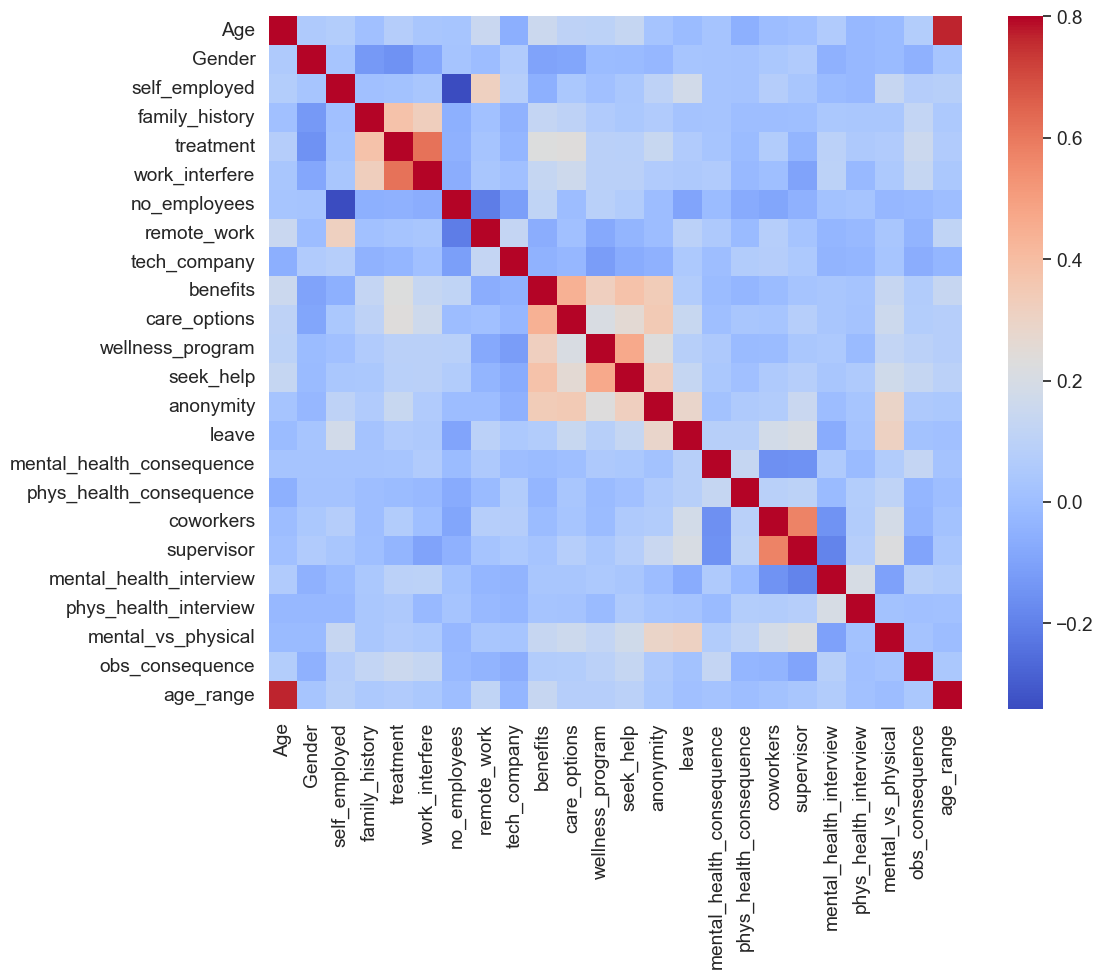

In [277]:
# matriks korelasi
corrmat = train_df.corr() # menghitung matriks korelasi dari DataFrame train_df
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm');
plt.show()

Korelasi menunjukkan seberapa kuat hubungan linier antara dua variabel (nilai antara -1 sampai 1):

+1: korelasi positif sempurna

0: tidak ada korelasi

-1: korelasi negatif sempurna

Analisis heatmap :
Beberapa fitur menunjukkan korelasi tinggi satu sama lain. Beberapa pasangan penting:

- family_history dengan treatment
    Korelasi positif cukup kuat. Artinya, orang dengan riwayat keluarga terkait kesehatan mental cenderung lebih mungkin menjalani pengobatan.

- benefits dengan care_options / wellness_program
    Korelasi positif tinggi. Artinya, perusahaan yang menyediakan manfaat (benefits) biasanya juga menyediakan opsi perawatan dan program kebugaran.

- mental_health_consequence dengan phys_health_consequence
    Keduanya berkorelasi cukup kuat → kemungkinan menunjukkan bahwa konsekuensi masalah mental dan fisik saling berkaitan dalam persepsi karyawan.

- Banyak fitur seperti Gender, Coworkers, Supervisor, Remote_work, dll memiliki korelasi rendah dengan sebagian besar fitur lain. Ini berarti fitur-fitur tersebut cenderung berdiri sendiri, atau tidak banyak berkontribusi pada hubungan linier antar variabel lainnya.

- Beberapa fitur tampak memiliki korelasi negatif lemah (biru muda). Misalnya: no_employees dengan self_employed → ini masuk akal karena jumlah karyawan kecil bisa jadi berasal dari mereka yang wiraswasta.

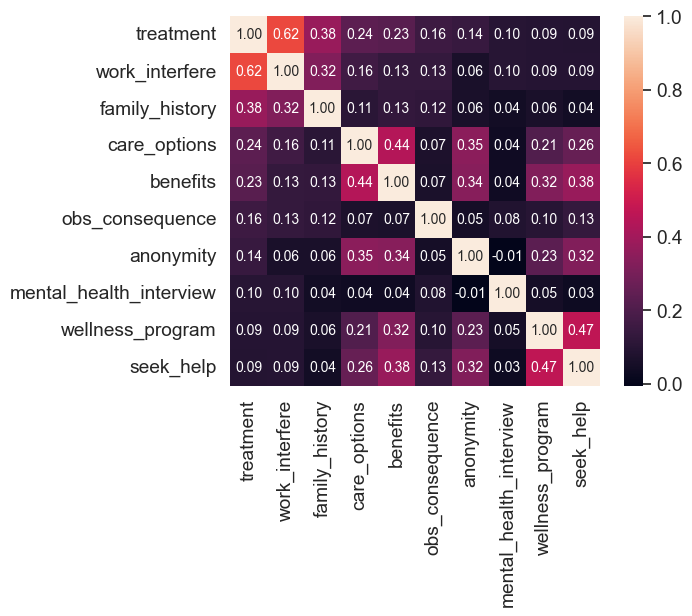

In [278]:
# Matriks Korelasi untuk kolom 'treatment'
k = 10 # jumlah kolom yang akan ditampilkan dalam matriks korelasi
cols = corrmat.nlargest(k, 'treatment')['treatment'].index # mengambil 10 kolom dengan korelasi tertinggi terhadap kolom 'treatment'
cm = np.corrcoef(train_df[cols].values.T) # membuat matriks korelasi dari nilai-nilai dalam kolom yang dipilih
sns.set(font_scale=1.25) # mengatur skala font untuk heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Fitur yang paling berkorelasi dengan fitur treatment :
    - fitur work_interfere memiliki hubungan paling kuat dengan nilai korelasi 0.62. Artinya, orang yang merasa pekerjaannya terganggu oleh masalah kesehatan mental lebih cenderung menjalani treatment.

    - family_history memiliki hubungan yang cukup kuat dengan nilai korelasi 0.38. Artinya, memiliki riwayat keluarga terkait kesehatan mental berhubungan sedang dengan kecenderungan untuk menjalani treatment.

    - care_options memiliki hubungan yang cukup kuat dengan nilai korelasi 0.24. Artinya, Tersedianya opsi perawatan di perusahaan sedikit berhubungan dengan treatment.

    - benefits memiliki hubungan yang cukup kuat dengan nilai korelasi 0.23. Artinya, adanya tunjangan kesehatan juga berkorelasi (rendah-menengah) dengan treatment.

    -obs_consequence  lemah dengan nilai korelasi 0.16. Artinya, Jika ada konsekuensi di pekerjaan bila kondisi mental diketahui, masih ada pengaruh (lemah).

Korelasi antar fitur yang bukan target (antar fitur selain treatment): 
    - fitur care_options dengan benefits dengan nilai korelasi yaitu 0.44. Hubungan ini cukup kuat dan hal tersebut cukup logis, karena perusahaan yang memberi tunjangan biasanya juga memberi opsi perawatan.

    - seek_help dengan wellness_program dengan nilai korelasi yaitu 0.47. Hubungan ini cukup kuat dan menunjukkan bahwa kehadiran program kesehatan mendorong seseorang untuk mencari bantuan.
    
    - care_options dengan anonymity dengan nilai korelasi yaitu 0.35. Hubungan ini cukup kuat, hal ini mungkin dapat terjadi apabila perusahaan yang memberi opsi perawatan juga menjamin anonimitas.

### **Visualisasi Grafik untuk melihat korelasi antar fitur**

**Distribution** and density dari fitur Age

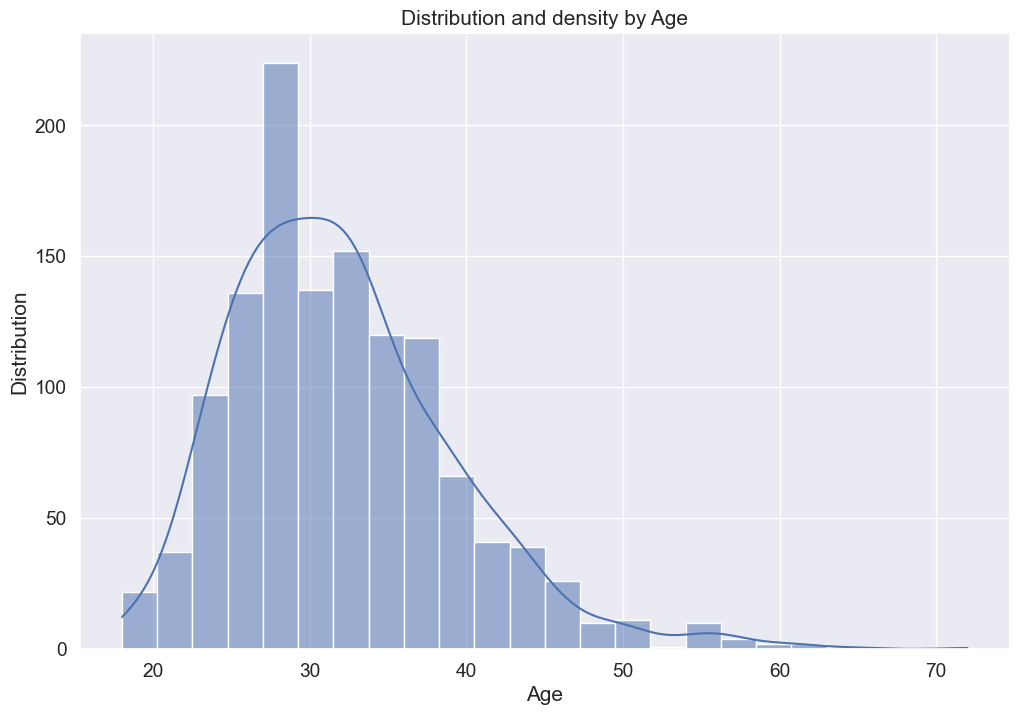

In [279]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.histplot(data=train_df, x="Age", kde=True, bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.show()


1. Terlihat bahwa mayoritas responden berada di rentang usia 25–35 tahun. Kurva menurun secara tajam setelah usia 40, dan hampir tidak ada responden di atas usia 60. Ini mengindikasikan bahwa data tidak berdistribusi normal, tetapi miring ke kanan.

2. Puncak histogram (mode) berada di sekitar usia 28–30 tahun. Ini menunjukkan bahwa kelompok usia muda dewasa adalah responden terbanyak dalam data.

Separate by treatment

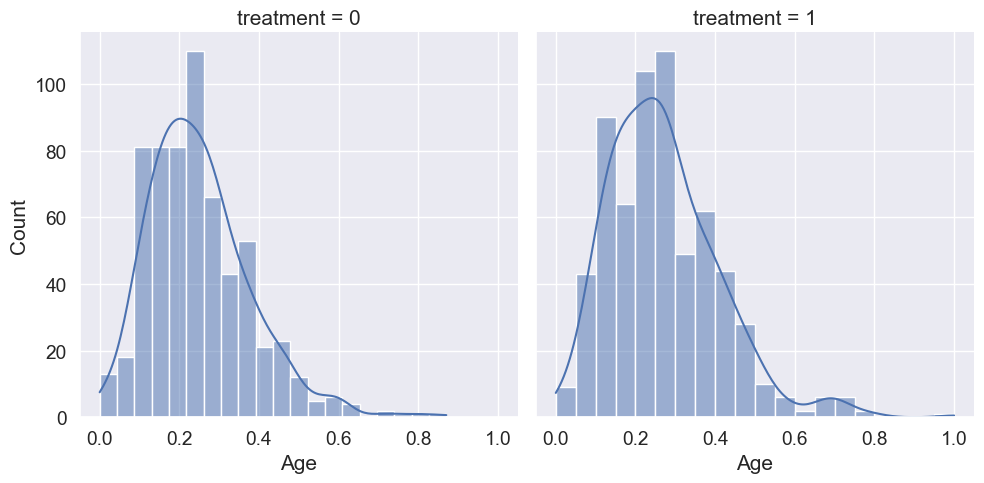

In [309]:
# Pastikan 'treatment' adalah kolom kategorikal dan 'Age' numerik
g = sns.FacetGrid(train_df, col='treatment', height=5)
g.map_dataframe(sns.histplot, x="Age", kde=True, bins=20)

# Tampilkan plot
plt.show()

- istribusi usia (Age) berdasarkan status treatment terhadap kesehatan mental:
    treatment = 0: Tidak menerima atau tidak mencari pengobatan.
    treatment = 1: Menerima atau mencari pengobatan.
- Skala pada sumbu x adalah antara 0 dan 1, yang menunjukkan bahwa fitur "Age" telah di-scaling, dengan data sebesar 0 menunjukkan usia muda dan 1 usia tua.
- Kedua grafik (treatment=0 dan treatment=1) menunjukkan distribusi usia yang cukup mirip dengan Puncak distribusi berada sekitar usia 0.2–0.3 (berarti sekitar usia 25–35 tahun jika dikembalikan ke skala asli). Distribusi berbentuk right-skewed (condong ke kanan) yang artinya sebagian besar responden berusia muda.
- Tinggi batang histogram pada treatment = 1 secara umum sedikit lebih tinggi dibanding treatment = 0 dalam rentang usia yang sama. Ini mengindikasikan: Responden yang menerima treatment lebih banyak pada kelompok usia produktif (sekitar 25–35 tahun).
- Sedikit sekali individu berusia di atas 0.6 (~lebih dari 55 tahun), baik yang menerima maupun tidak menerima treatment.

Berapa banyak orang yang melakukan treatment?

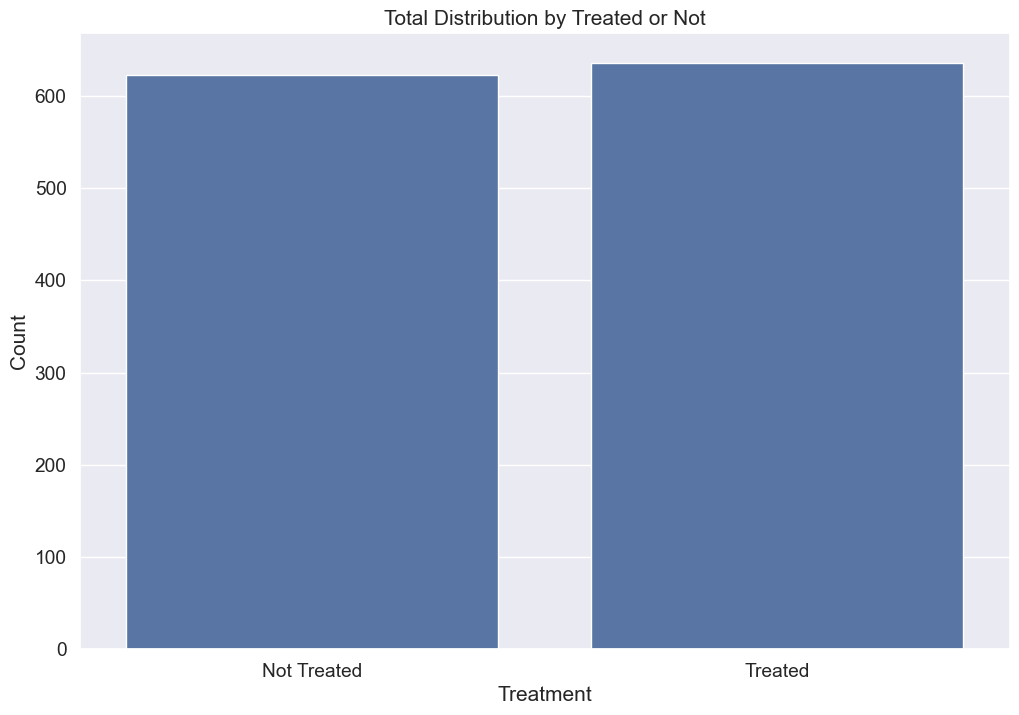

In [310]:
plt.figure(figsize=(12,8))
sns.countplot(x="treatment", data=train_df)
plt.xticks([0, 1], ['Not Treated', 'Treated'])  # Label yang benar dan informatif
plt.title('Total Distribution by Treated or Not')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


Lebih banyak responden yang melakukan treatment dibanding yang tidak melakukan

Diagram batang bersarang untuk menampilkan probabilitas berdasarkan kelas dan jenis kelamin

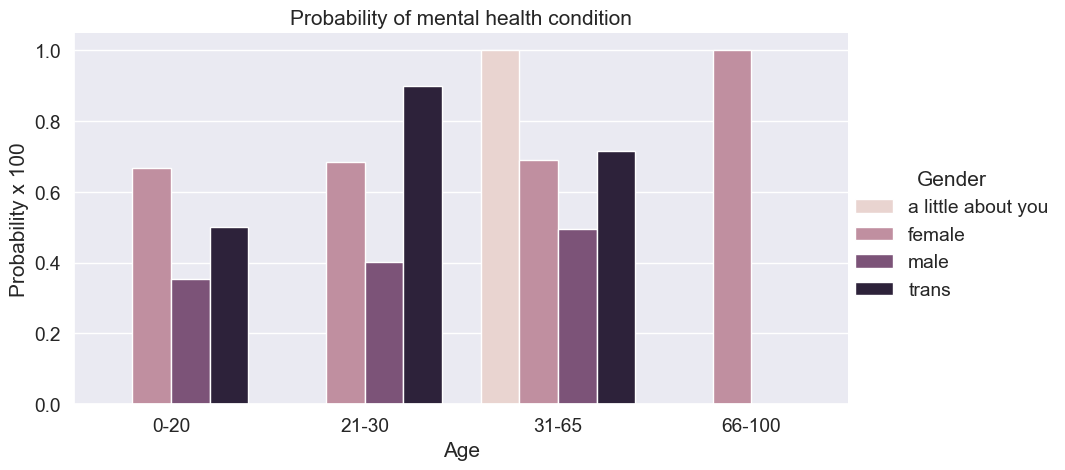

In [ ]:
# membuat nested barplot (diagram batang bersarang) yang menunjukkan probabilitas (kemungkinan) seseorang mendapatkan perawatan kesehatan mental (treatment) berdasarkan rentang usia (age_range) dan jenis kelamin (Gender).
o = labelDict['label_age_range']

# Ganti 'size' dengan 'height' dan 'ci=None' dengan 'errorbar=None'
g = sns.catplot(
    x="age_range", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar",  
    errorbar=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set label untuk sumbu X
g.set_xticklabels(o)

# Set judul dan label sumbu
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Ganti label legenda
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Atur posisi legenda
g.fig.subplots_adjust(top=0.9, right=0.8)

# Tampilkan plot
plt.show()


1. Gender memengaruhi probabilitas mendapatkan perawatan, dengan perempuan secara konsisten memiliki tingkat lebih tinggi dibanding laki-laki.

2. Transgender memiliki tingkat probabilitas tertinggi di usia muda dan dewasa muda, menyoroti kelompok ini sebagai prioritas perhatian dalam kesehatan mental.

3. Perbedaan gender semakin menyempit dengan bertambahnya usia, mungkin karena meningkatnya kesadaran atau kebutuhan akan kesehatan mental di semua gender.

4. Data pada kategori usia lanjut (66–100) dan label a little about you perlu ditinjau, karena kemungkinan terlalu kecil untuk dijadikan dasar generalisasi.

Diagram batang untuk menunjukkan kemungkinan berdasarkan adanya riwayat keluarga terkait kondisi kesehatan mental

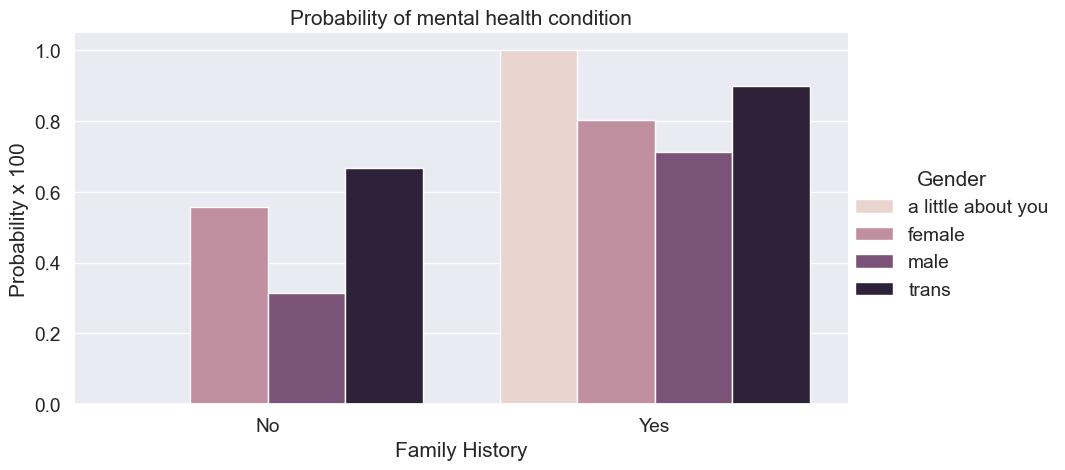

In [283]:
# Ambil label untuk sumbu X
o = labelDict['label_family_history']

# Gunakan catplot, bukan factorplot
g = sns.catplot(
    x="family_history",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    errorbar=None,        # Ganti dari ci=None
    height=5,             # Ganti dari size=5
    aspect=2,
    legend_out=True
)

# Set label kategori sumbu X
g.set_xticklabels(o)

# Tambah judul dan label sumbu
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Ganti label legenda
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Atur posisi legenda
g.fig.subplots_adjust(top=0.9, right=0.8)

# Tampilkan plot
plt.show()

Barplot to show probabilities for care options

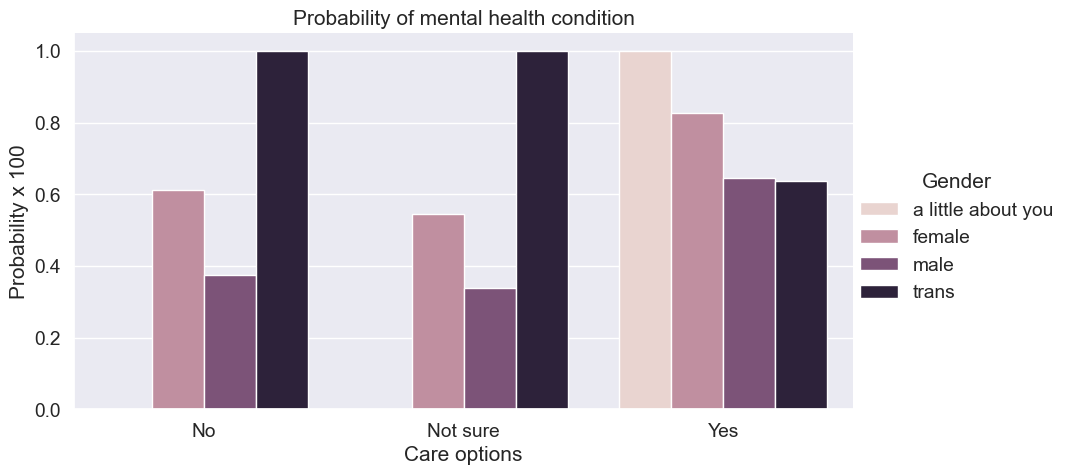

In [311]:
# Ambil label untuk sumbu X dari kamus labelDict
o = labelDict['label_care_options']

# Gunakan sns.catplot (bukan factorplot) dan ganti parameter deprecated
g = sns.catplot(
    x="care_options",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    errorbar=None,      # Ganti dari ci=None
    height=5,           # Ganti dari size=5
    aspect=2,
    legend_out=True
)

# Atur label sumbu X
g.set_xticklabels(o)

# Tambahkan judul dan label sumbu
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Ganti label legend dengan label dari labelDict
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Atur posisi legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


- Care Options = Yes
    - Semua gender menunjukkan probabilitas tinggi menerima perawatan kesehatan mental dengan gender “a little about you” mencapai 100% probabilitas. Sedangkan untuk gender Female kurang dari 80% dann gender male dan Trans sekitar 65%
    
    - Ketersediaan opsi perawatan berhubungan kuat dengan penerimaan treatment, terutama bagi kelompok minoritas gender.

- Care Options = Not Sure
    - Probabilitas menurun secara signifikan, semua gender di bawah 60%.
    - Ini mengindikasikan bahwa ketidakpastian tentang akses perawatan menurunkan kecenderungan mencari bantuan.

- Care Options = No
    - Probabilitas makin menurun (kecuali "trans" yang tetap tinggi). Transgender tetap menunjukkan probabilitas 100%, meskipun tidak ada care options, hal ini kemungkinan bisa jadi karena faktor internal atau dukungan komunitas khusus, namun ini juga bisa anomali yang perlu diselidiki lebih lanjut.


Diagram batang untuk menunjukkan probabilitas dari fitur benefits

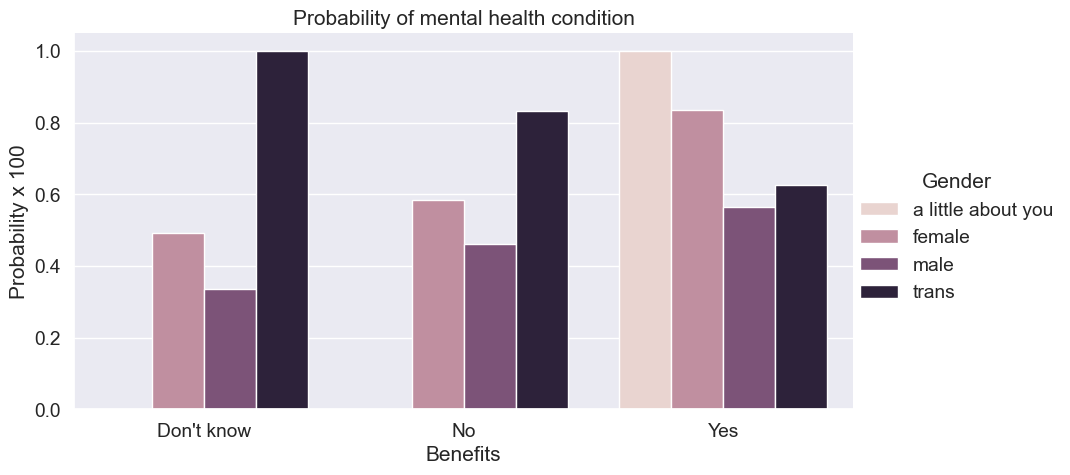

In [ ]:
# mengevaluasi pengaruh “benefits” dari tempat kerja terhadap peluang seseorang menerima perawatan kesehatan menta
# Ambil label dari labelDict sesuai variabel x
o = labelDict['label_benefits']

# Perhatikan bahwa kita ganti x="benefits", bukan "care_options"
g = sns.catplot(
    x="benefits",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    errorbar=None,     # Ganti dari ci=None
    height=5,          # Ganti dari size=5
    aspect=2,
    legend_out=True
)

# Atur label sumbu X
g.set_xticklabels(o)

# Tambahkan judul dan label sumbu
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Ganti label legend
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Atur posisi legenda
g.fig.subplots_adjust(top=0.9, right=0.8)

# Tampilkan plot
plt.show()


Diagram di atas adalah diagram batang (barplot) yang menunjukkan probabilitas (dalam skala 0–1 dikalikan 100) seseorang mengalami masalah kesehatan mental, berdasarkan:
    - Tingkat ketersediaan "Benefits" (manfaat dukungan kesehatan mental dari perusahaan): Don't know, No, Yes
    -Jenis kelamin: a little about you, female, male, trans

Interpretasi grafik :

    - Kategori yes (Perusahaan menyediakan benefits):
    Semua gender menunjukkan probabilitas masalah kesehatan mental yang tinggi, terutama pada kelompok a little about you (100%) dan female (sekitar 83%). Hal ini bisa menunjukkan bahwa walaupun ada dukungan, tingkat masalah mental tetap tinggi.

    - Kategori “No” (Perusahaan tidak menyediakan benefits): 
    Terjadi penurunan probabilitas dibanding kategori “Yes”, tetapi tetap relatif tinggi untuk trans (sekitar 83%) dan female (sekitar 58%).

    - Kategori “Don't know” (Tidak tahu apakah perusahaan menyediakan benefits):
    Probabilitas terendah untuk female dan male (sekitar 50% dan 35%).Namun, trans tetap menunjukkan 100% pada kategori ini — artinya kelompok trans mengalami masalah kesehatan mental tinggi terlepas dari pengetahuan tentang dukungan perusahaan.

- Berdasarkan pengelompokan gender, diperoleh :
    - Kelompok trans konsisten menunjukkan probabilitas tertinggi dalam ketiga kategori, hal ini mengindikasikan kerentanan yang lebih besar terhadap isu kesehatan mental, terlepas dari dukungan perusahaan.

    - Kelompok female juga menunjukkan probabilitas lebih tinggi daripada male.

    - Kategori a little about you meskipun tidak jelas, menunjukkan probabilitas ekstrem yang perlu ditelusuri lebih lanjut (mungkin karena ukuran sampel kecil atau ketidakterdefinisian kategori ini).

Gender sangat memengaruhi probabilitas: kelompok trans paling rentan, disusul oleh female.

Diagram batang untuk menunjukkan probabilitas gangguan dari pekerjaan

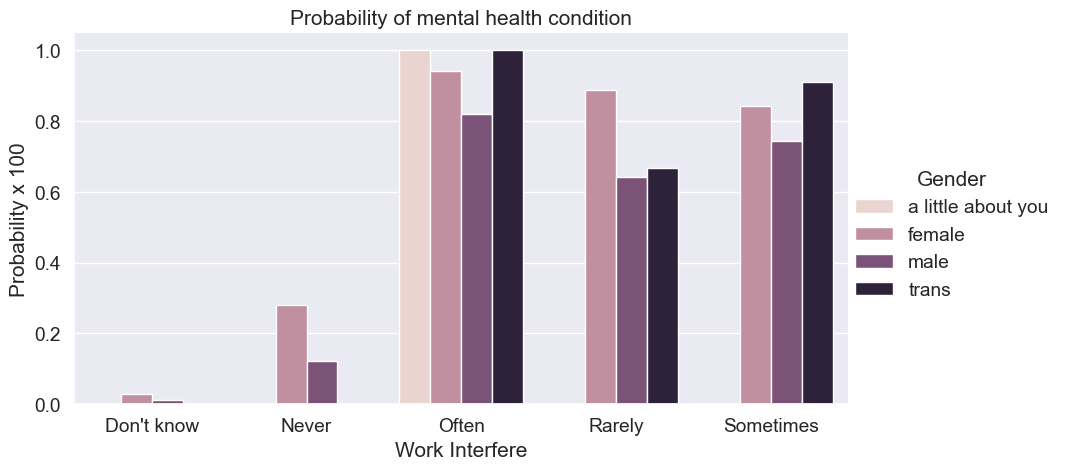

In [ ]:
# memvisualisasikan apakah ada korelasi antara frekuensi gangguan pekerjaan terhadap kondisi kesehatan mental, serta membedakan hasilnya berdasarkan gender.
# Ambil label dari kamus labelDict
o = labelDict['label_work_interfere']

# Gunakan catplot, bukan factorplot
g = sns.catplot(
    x="work_interfere",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    errorbar=None,      # Ganti dari ci=None
    height=5,           # Ganti dari size=5
    aspect=2,
    legend_out=True
)

# Atur label untuk sumbu X
g.set_xticklabels(o)

# Tambahkan judul dan label sumbu
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Ganti label legend
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Atur posisi legend
g.fig.subplots_adjust(top=0.9, right=0.8)

# Tampilkan plot
plt.show()


Interpretasi :

- Often (Sering terganggu pekerjaan) :
Probabilitas sangat tinggi untuk semua gender (sekitar 81–100%) dengan gender trans dan "a little about you" mencapai 100%. Hal ini menunjukkan bahwa semakin sering pekerjaan mengganggu, semakin besar kemungkinan seseorang menjalani perawatan.

- Sometimes dan Rarely :
Probabilitas tetap tinggi, tetapi sedikit lebih rendah dibanding "Often" dengan gender Female tetap paling tinggi (~83–90%), male dan trans di kisaran 65–75%. Hal ini nenunjukkan bahwa meskipun gangguan hanya kadang-kadang atau jarang, banyak orang tetap menjalani perawatan.

- Never (Pekerjaan tidak pernah mengganggu)
Probabilitas jauh lebih rendah, sekitar 13–29%. Hal ini menandakan bahwa tanpa gangguan dari pekerjaan, kemungkinan menjalani perawatan juga kecil.

- Don't Know
Probabilitas sangat rendah untuk semua gender (0–5%). Hal ini mungkin menunjukkan bahwa ketidaktahuan terhadap apakah pekerjaan mengganggu membuat seseorang juga kurang sadar akan kondisi mentalnya atau tidak mengakses perawatan.


Apabila berdasarkan pola gender yang dapat ditinjau sebagai beirkut:

- Female cenderung memiliki probabilitas tertinggi secara konsisten dalam semua kategori.

- Trans juga menunjukkan probabilitas tinggi terutama pada kategori Often dan Sometimes.

- Male cenderung memiliki probabilitas yang lebih rendah dibandingkan gender lain.

- Kategori a little about you (mungkin isian bebas) fluktuatif, tapi menunjukkan probabilitas ekstrim pada kategori Often (100%).



### **Scaling and Fitting**

Skalasi Fitur — Dilakukan penskalaan pada usia, karena nilainya sangat berbeda dibandingkan fitur lainnya.

In [287]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.351852,1,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.481481,2,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.259259,2,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.240741,2,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.240741,2,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


### ?Data Processing

### **Spilitting Dataset**

In [288]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

1. definisi fitur (x) dan target (y) :
X: data fitur (predictor) dari train_df, yaitu subset yang hanya berisi kolom-kolom dalam feature_cols
y :  target/label, yaitu kolom treatment berisi informasi apakah seseorang menjalani perawatan kesehatan mental (binary classification: Yes/No)

2. membagi data untuk training dan testing (split data) :
- membagi data menjadi 2 bagian, yaitu data training dan data testing dengan perbandingan 70% untuk data training dan 30% untuk data testing.

3. Menyiapkan Dictionary untuk Evaluasi Model

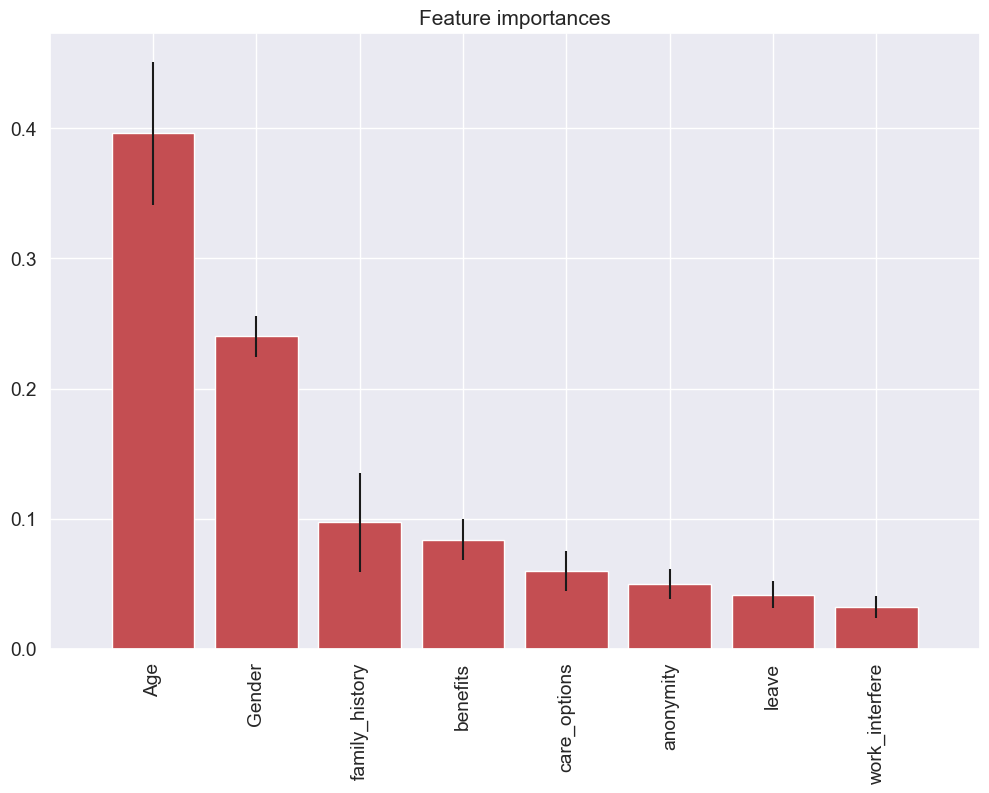

In [ ]:
# Menentukan dan Memvisualisasikan Pentingnya Fitur (Feature Importance) dengan algoritma extra trees classifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0) # Inisialisasi model Extra Trees Classifier

forest.fit(X, y) # melatih model dengan data fitur X dan target y (treatment)
# Menghitung pentingnya fitur
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
# Mengurutkan fitur berdasarkan pentingnya
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# plot hasil pentingnya fitur
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Interpretasi : 

1. Fitur Paling Penting: Age
Age memiliki pengaruh terbesar terhadap keputusan model. Artinya, usia individu merupakan indikator utama yang paling membantu model memprediksi apakah seseorang menerima perawatan kesehatan mental. Namun, error bar-nya cukup tinggi, menandakan ada variasi antar tree dalam forest (model ensemble).

2. Fitur Penting Berikutnya: Gender
Gender juga berpengaruh besar, dengan nilai penting menempati kedua tertinggi. Hal ini mengindikasikan bahwa jenis kelamin dapat memengaruhi kecenderungan seseorang untuk menerima perawatan kesehatan mental yang kemungkinan bisa karena perbedaan persepsi, stigma, atau akses layanan.

3. Fitur Menengah:
family_history, benefits, care_options, dan anonymity memiliki tingkat kepentingan sedang. Artinya, faktor riwayat keluarga dengan masalah kesehatan mental, Manfaat/perlindungan perusahaan terhadap kesehatan mental (benefits), Ketersediaan opsi perawatan (care_options), Anonimitas saat mengakses layanan (anonymity), semuanya memberikan kontribusi penting, tapi tidak dominan dibanding Age dan Gender.

4. Fitur Kurang Penting terdapat leave dan work_interfere
leave (kebijakan cuti terkait kesehatan mental) dan work_interfere (seberapa besar pekerjaan mengganggu kesehatan mental) berada di peringkat bawah. Artinya, dalam model ini, data terkait cuti dan gangguan kerja tidak terlalu membantu dalam memprediksi keputusan pengobatan — atau bisa juga karena informasi ini tidak konsisten/bervariasi kecil di data.


#Tuning

In [290]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d", cmap='coolwarm') 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold=0.3).ravel()

    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

Tuning with cross validation score

In [291]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

Tuning with GridSearchCV

In [292]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

Tuning with RandomizedSearchCV

In [293]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Tuning with searching multiple parameters simultaneously

In [294]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

### **Evaluating models**

KNeighbors Classifier

In [295]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand. Best Score:  0.8186920634920634
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[np.float64(0.821), np.float64(0.808), np.float64(0.817), np.float64(0.821), np.float64(0.819), np.float64(0.817), np.float64(0.817), np.float64(0.821), np.float64(0.812), np.float64(0.818), np.float64(0.817), np.float64(0.817), np.float64(0.819), np.float64(0.821), np.float64(0.821), np.float64(0.817), np.float64(0.817), np.float64(0.817), np.float64(0.816), np.float64(0.821)]
Accuracy: 0.8201058201058201
Null accuracy:
 treatment
1    192
0    186
Name: count, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0]


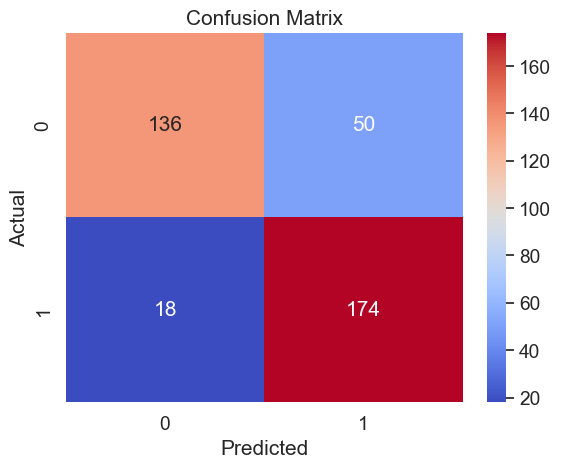

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.26881720430107525
Precision: 0.7767857142857143
AUC Score: 0.8187163978494624
Cross-validated AUC: 0.8789270894289617
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [0.96296296 0.03703704]
 [0.44444444 0.55555556]
 [0.33333333 0.66666667]
 [0.07407407 0.92592593]
 [0.62962963 0.37037037]
 [0.25925926 0.74074074]
 [0.33333333 0.66666667]
 [0.40740741 0.59259259]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.03703704]
 [0.55555556]
 [0.66666667]
 [0.92592593]
 [0.37037037]
 [0.74074074]
 [0.66666667]
 [0.59259259]]


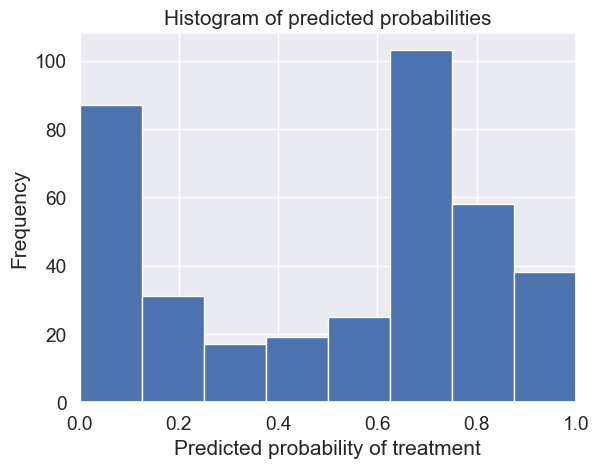

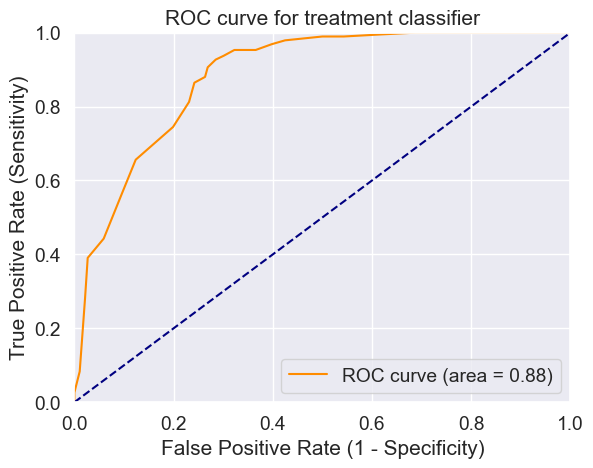

[[136  50]
 [ 18 174]]


In [296]:
Knn()

#### **Random Forest**

Random forest merupakan teknik yang digunakan untuk menyelesaikan masalah klasifikasi maupun regresi dan didasarkan pada pendekatan supervised machine learning. Namun, teknik ini lebih sering digunakan untuk klasifikasi. Teknik ini dinamakan random forest karena melibatkan banyak pohon keputusan (decision tree) yang membentuk “hutan” dengan menerima fitur-fitur acak dari data input sebagai masukan [6].

In [297]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Fungsi Random Forest untuk prediksi dan evaluasi
def randomForest():
    # 1. Inisialisasi model RandomForestClassifier dasar
    forest = RandomForestClassifier(n_estimators=20)

    # 2. Tentukan range parameter untuk tuning hyperparameter
    featuresSize = len(feature_cols)
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # 3. Proses tuning parameter menggunakan fungsi helper (misal RandomizedSearchCV)
    # tuningRandomizedSearchCV diasumsikan adalah fungsi custom untuk mencari parameter terbaik
    tuningRandomizedSearchCV(forest, param_dist)
    
    # 4. Inisialisasi ulang model dengan parameter hasil tuning (atau yang sudah diuji paling baik)
    forest = RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=8,
        min_samples_split=2,
        n_estimators=20,
        random_state=1
    )

    # 5. Latih model menggunakan data latih (fit)
    my_forest = forest.fit(X_train, y_train)
    
    # 6. Prediksi kelas pada data uji
    y_pred_class = my_forest.predict(X_test)
    
    # 7. Evaluasi hasil prediksi menggunakan fungsi helper evalClassModel (misal hitung akurasi, f1-score, dsb)
    # evalClassModel diasumsikan adalah fungsi custom untuk evaluasi dan bisa juga menampilkan classification report/confusion matrix
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # 8. Simpan nilai akurasi dalam dictionary methodDict untuk visualisasi perbandingan model
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.830615873015873
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[np.float64(0.831), np.float64(0.833), np.float64(0.832), np.float64(0.831), np.float64(0.836), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.835), np.float64(0.831), np.float64(0.835), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.832), np.float64(0.833), np.float64(0.833), np.float64(0.832), np.float64(0.835), np.float64(0.832)]
Accuracy: 0.8148148148148148
Null accuracy:
 treatment
1    192
0    186
Name: count, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0]


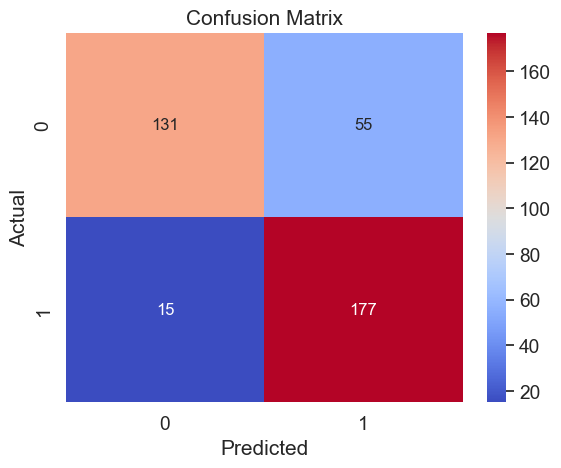

Classification Accuracy: 0.8148148148148148
Classification Error: 0.18518518518518523
False Positive Rate: 0.2956989247311828
Precision: 0.7629310344827587
AUC Score: 0.8130880376344087
Cross-validated AUC: 0.8949101313912662
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.19645683 0.80354317]
 [0.97046985 0.02953015]
 [0.95846755 0.04153245]
 [0.54132721 0.45867279]
 [0.40054155 0.59945845]
 [0.16488667 0.83511333]
 [0.82738063 0.17261937]
 [0.23250176 0.76749824]
 [0.26979261 0.73020739]
 [0.23409479 0.76590521]]
First 10 predicted probabilities:
 [[0.80354317]
 [0.02953015]
 [0.04153245]
 [0.45867279]
 [0.59945845]
 [0.83511333]
 [0.17261937]
 [0.76749824]
 [0.73020739]
 [0.76590521]]


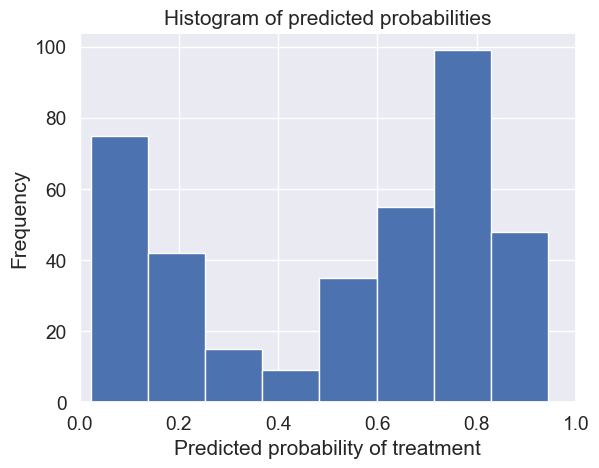

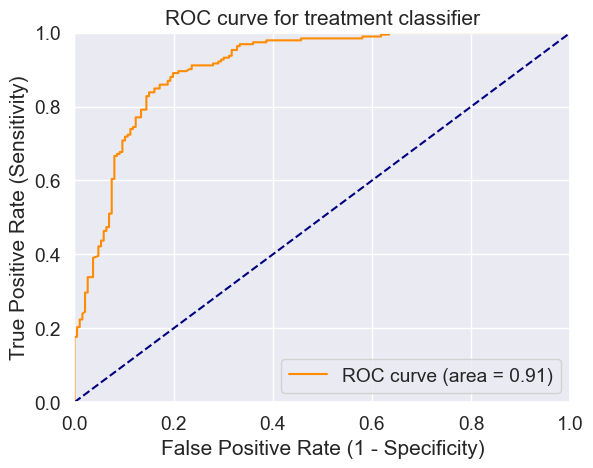

[[131  55]
 [ 15 177]]


In [298]:
# Panggil fungsi
randomForest()

#Predicting with Neural Network

Create input function

In [299]:
pip install tensorflow==1.15

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==1.15


In [300]:

import tensorflow as tf
import argparse

In [301]:
print(tf.__version__)

2.19.0


In [302]:
import tensorflow as tf

# Misal input_dim = banyak fitur, num_classes = jumlah kelas output
input_dim = 20         # ganti dengan jumlah fitur sebenarnya
num_classes = 2        # misal klasifikasi biner

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\zakyw\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342 (1.34 KB)

 Trainable params: 342 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

Define the feature columns

In [303]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

Instantiate an Estimator

In [304]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # output layer
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the model

In [305]:
# Contoh data dummy 8 fitur
X_train = np.random.rand(100, 8).astype(np.float32)
y_train = np.random.randint(0, 2, size=(100,))
X_test = np.random.rand(30, 8).astype(np.float32)
y_test = np.random.randint(0, 2, size=(30,))

# Model sesuai fitur 8
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10)

eval_result = model.evaluate(X_test, y_test, batch_size=32)
print('\nTest set accuracy: {:.2f}%'.format(eval_result[1] * 100))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4906 - loss: 0.6961 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5928 - loss: 0.6749
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5834 - loss: 0.6787
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5844 - loss: 0.6775 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5428 - loss: 0.6873 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5677 - loss: 0.6783 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5459 - loss: 0.6848
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5346 - loss: 0.6827
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5273 - loss: 0.6876 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5907 - loss: 0.6710
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5333 - loss: 0.7121

Test set accuracy: 53.33%


Evaluate the model

Making predictions (inferring) from the trained model

In [306]:
predictions = list(model.predict(X_train, batch_size=batch_size))


NameError: name 'batch_size' is not defined

In [ ]:
col1 = []
col2 = []
col3 = []

for idx, input_label, p in zip(range(len(X_train)), y_train, predictions):
    class_id = np.argmax(p)          # Prediksi kelas dari output probabilitas
    probability = p[class_id]        # Probabilitas kelas tersebut

    col1.append(idx)                 # Index
    col2.append(class_id)            # Prediksi
    col3.append(input_label)         # Label sebenarnya

results = pd.DataFrame({'index': col1, 'prediction': col2, 'expected': col3})
print(results.head())

   index  prediction  expected
0      0           0         1
1      1           0         0
2      2           0         1
3      3           0         1
4      4           0         0


#Success method plot

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

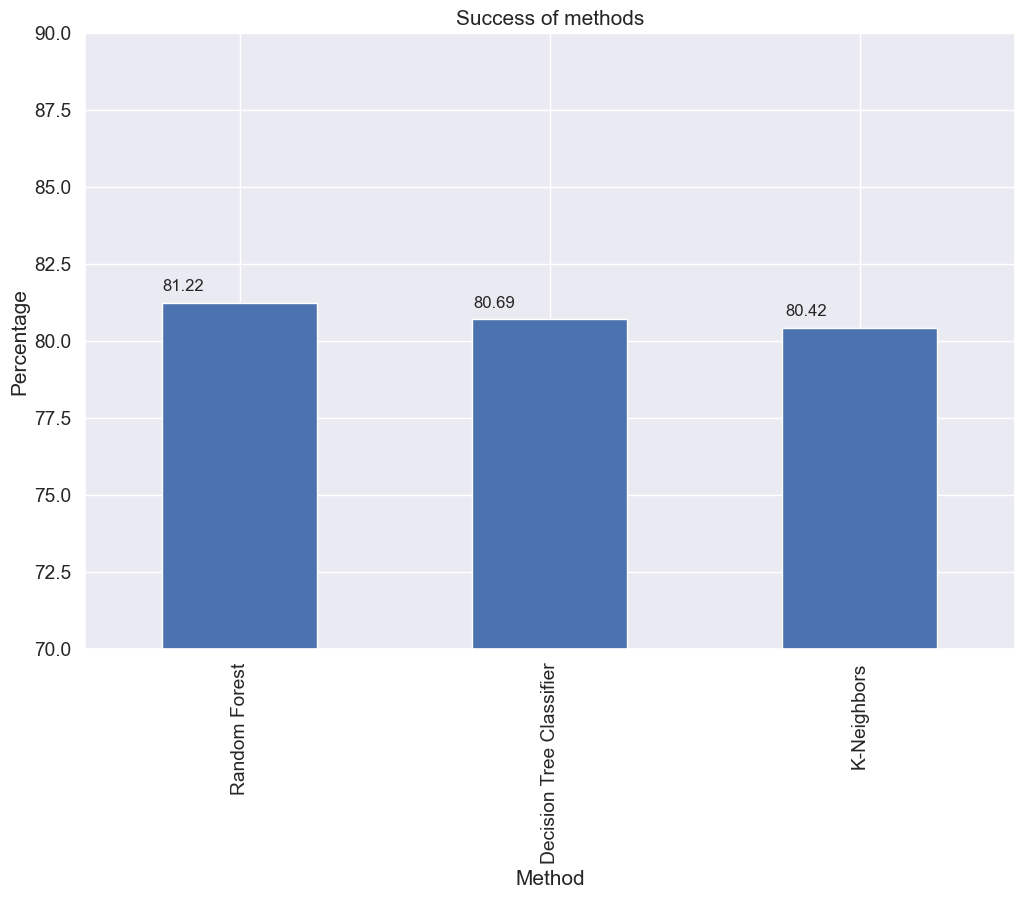

In [ ]:
plotSuccess()

#Creating predictions on test set

In [ ]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': range(len(X_test)), 'Treatment': dfTestPredictions})
results.to_csv('results.csv', index=False)
results.head()


C:\Users\zakyw\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


,Index,Treatment
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## **Hasil dan Pembahasan**

### 2. Random Forest

### **2.1. Confusion Matrix**

Confusion matrix menggambarkan kemampuan model dalam membedakan dua kelas, yaitu 0 (tidak membutuhkan treatment) dan 1 (membutuhkan treatment).

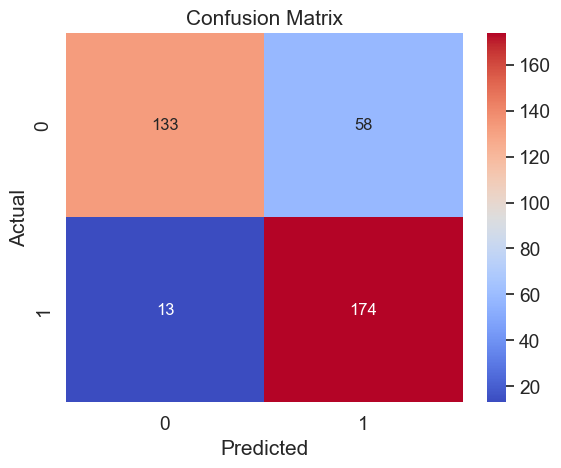

* **True Negatives (TN):** 133 — benar diprediksi tidak butuh treatment.
* **False Positives (FP):** 58 — salah diprediksi butuh treatment, padahal sebenarnya tidak.
* **False Negatives (FN):** 13 — salah diprediksi tidak butuh treatment, padahal sebenarnya butuh.
* **True Positives (TP):** 174 — benar diprediksi butuh treatment.

**Error Metrics:**

* **Precision (class 1):** 0.75
  Dari seluruh prediksi yang menyatakan butuh treatment, 75% benar-benar membutuhkan.
* **Recall (class 1):** 0.9305
  Model sangat baik dalam mengenali kasus yang memang membutuhkan treatment.
* **False Positive Rate:** 0.3037
  Sekitar 30% data yang sebenarnya tidak membutuhkan treatment, diprediksi sebaliknya oleh model.

Berdasarkan data diatas, terlihat bahwa model ini sangat baik dalam menemukan orang yang memang benar-benar membutuhkan perawatan, terbukti dari sedikitnya kasus yang terlewat (hanya 13 dari ratusan data). Namun, ada sekitar 30% orang yang sebenarnya tidak butuh perawatan tapi diprediksi sebaliknya. Meskipun begitu, model masih cukup tepat, karena dari seluruh prediksi "butuh perawatan", 75% di antaranya benar-benar butuh.


### **2.2. Histogram Probabilitas Prediksi**

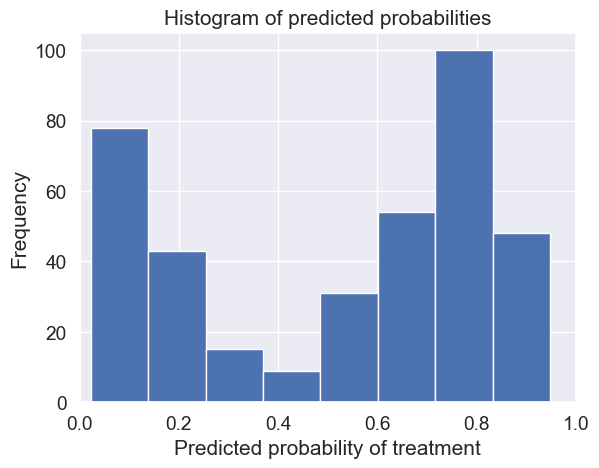

Histogram menunjukkan distribusi probabilitas prediksi yang dihasilkan oleh model untuk masing-masing kelas. Sebagian besar prediksi probabilitas berada pada rentang 0.6 hingga 0.9, menandakan bahwa model sering memberikan prediksi yang yakin ketika menentukan suatu sampel termasuk dalam kelas membutuhkan treatment.

### **2.3. Area di Bawah ROC Curve**

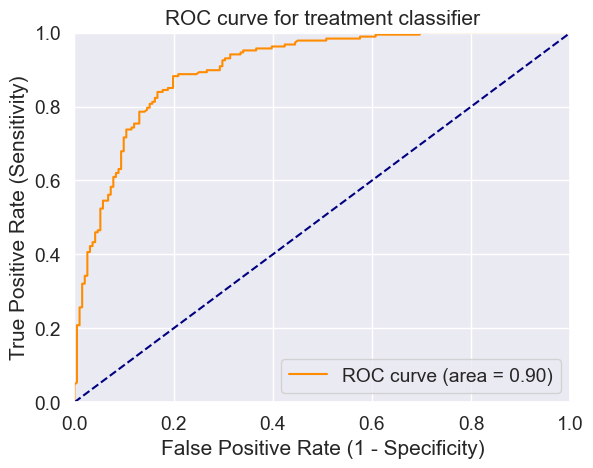

ROC curve menggambarkan hubungan antara true positive rate (sensitivity) dan false positive rate untuk berbagai nilai threshold. Nilai Area Under the Curve (AUC) sebesar 0.90 menunjukkan bahwa model memiliki kemampuan sangat baik dalam membedakan antara individu yang membutuhkan dan tidak membutuhkan treatment. Nilai AUC yang semakin mendekati 1 menandakan performa model yang semakin baik dalam klasifikasi dua kelas tersebut.


## **Referensi**

[1]	 World Health Organization, "Investing in treatment for depression and anxiety leads to fourfold return," WHO, 13-Apr-2016. [Online]. Available: https://www.who.int/news/item/13-04-2016-investing-in-treatment-for-depression-and-anxiety-leads-to-fourfold-return. [Accessed: 09-Jun-2025].

[2]	World Health Organization, "Mental health in the workplace," WHO. [Online]. Available: https://www.who.int/teams/mental-health-and-substance-use/mental-health-in-the-workplace. [Accessed: 09-Jun-2025].

[3]	World Health Organization, "Promotion and prevention: Mental health in the workplace," WHO. [Online]. Available: https://www.who.int/teams/mental-health-and-substance-use/promotion-prevention/mental-health-in-the-workplace. [Accessed: 09-Jun-2025].

[4] E. S. Mohamed, T. A. Naqishbandi, S. A. C. Bukhari, I. Rauf, V. Sawrikar, and A. Hussain, "A hybrid mental health prediction model using Support Vector Machine, Multilayer Perceptron, and Random Forest algorithms," *Healthcare Analytics*, vol. 3, 2023, Art. no. 100185.

[5]  F. Ndikumana, J. Izabayo, J. Kalisa, M. Nemerimana, E. C. Nyabyenda, S. H. Muzungu, I. Komezurenge, M. Uwase, S. Ndagijimana, C. Twizere, and V. Sezibera, "Machine learning-based predictive modelling of mental health in Rwandan Youth," *Scientific Reports*, 2025.

[6] K. Vaishnavi *et al.*, "Predicting Mental Health Illness using Machine Learning Algorithms," *Journal of Physics: Conference Series*, vol. 2161, 2022, Art. no. 012021.
